# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "C:/Users/TheuriM/BootCamp/Challenges/Matplotlib_Challenge/Mouse_metadata.csv"
study_results_path = "C:/Users/TheuriM/BootCamp/Challenges/Matplotlib_Challenge/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
pypharma_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
pypharma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [4]:
# Checking the number of mice.
mice_count = pypharma_df["Mouse ID"].nunique()
mice_count

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
ID_timepoint = pd.DataFrame(pypharma_df[["Mouse ID", "Timepoint"]])
duplicate_ID = ID_timepoint[ID_timepoint.duplicated(subset=["Mouse ID", "Timepoint"],keep=False)]
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_ID=duplicate_ID['Mouse ID'].unique()
duplicate_ID

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_ID_Data = pypharma_df[pypharma_df['Mouse ID'].isin(duplicate_ID)]
duplicate_ID_Data 

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_pypharma_df = pypharma_df[pypharma_df["Mouse ID"]. isin(duplicate_ID)==False]
clean_pypharma_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
clean_pypharma_df=len(clean_pypharma_df['Mouse ID'].unique())
clean_pypharma_df

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
mean = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_dev = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"] .std()
sem = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_df = pd.DataFrame({
    "Mean Tumor Volume (mm3)":mean,
    'Median Tumor Volume (mm3)': median,
    'Variance -Tumor Volume (mm3)': variance,
    'Tumor Volume STd. Dev. (mm3)':std_dev,
    'Tumor Volume Std error':sem
})

summary_df


,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Variance -Tumor Volume (mm3),Tumor Volume STd. Dev. (mm3),Tumor Volume Std error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
advanced_Summary_df = pypharma_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean',"median","var","std", "sem"])
advanced_Summary_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

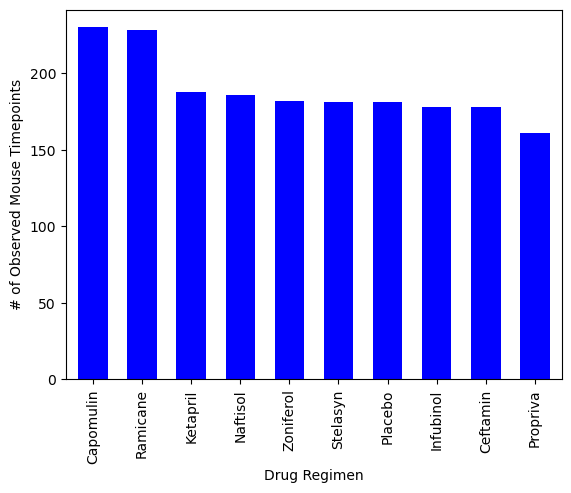

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# count of mice tested for each regimen
drug_regimen_df= pypharma_df["Drug Regimen"].value_counts()
# plotting in Pandas
drug_regimen_df.plot(kind="bar", color = "b", align="center",width=0.6, xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints" )
plt.show()

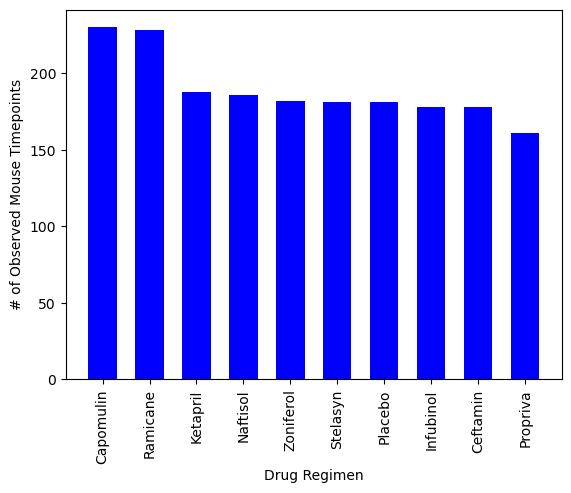

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drug_regimen_df.index,drug_regimen_df.values, color='b',align='center', width=0.6)

# Attaching labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

# To prevent overlap of ticks, rotate at 90 degrees
plt.xticks(rotation=90)

plt.show()


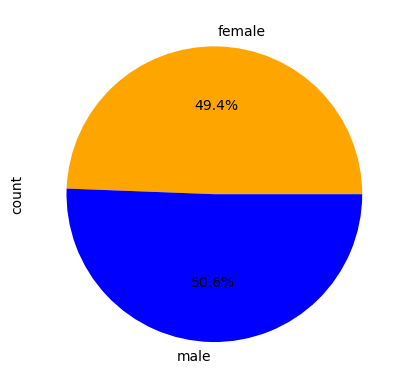

In [13]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_df = pypharma_df.groupby("Sex").size()
pandas_pie_df=gender_df
pandas_pie_df=gender_df.plot(kind='pie',autopct='%1.1f%%', colors=['orange','blue'], labels=['female', 'male'])

# Make the pie chart
plt.ylabel('count')

plt.show()

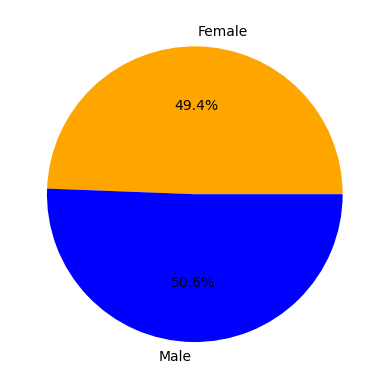

In [14]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_df=pypharma_df.groupby('Sex').size()
pie_plot=plt.pie(gender_df,labels=['Female','Male' ], colors=['orange','blue'], autopct ='%1.1f%%' )

# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimens=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
regimens_df=pypharma_df[pypharma_df['Drug Regimen'].isin(regimens)]

last_timepoint=regimens_df.groupby('Mouse ID')['Timepoint'].max()
last_timepoint_df=pd.DataFrame(last_timepoint)


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumor_df=pd.merge(last_timepoint_df,pypharma_df, how='left', on=['Mouse ID','Timepoint'])

last_tumor_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_data = []
outliers={}
treatments_df=last_tumor_df[last_tumor_df['Drug Regimen'].isin(treatments)] 

# Calculate the IQR and quantitatively determine if there are any potential outliers.
aggregated_data=treatments_df.groupby("Drug Regimen") ['Tumor Volume(mm3)']
quartiles = aggregated_data.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Determine outliers using upper and lower bounds
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)



for treatment in treatments:
   outliers[treatment]= aggregated_data.get_group(treatment).loc[
       (aggregated_data.get_group(treatment)<lower_bound[treatment]) |
         (aggregated_data.get_group(treatment )> upper_bound[treatment])
           ]


   
for treatment in treatments:
    print(f"{treatment}' ≤ potential outliers: {outliers[treatment]}")   

KeyError: 'Column not found: Tumor Volume(mm3)'

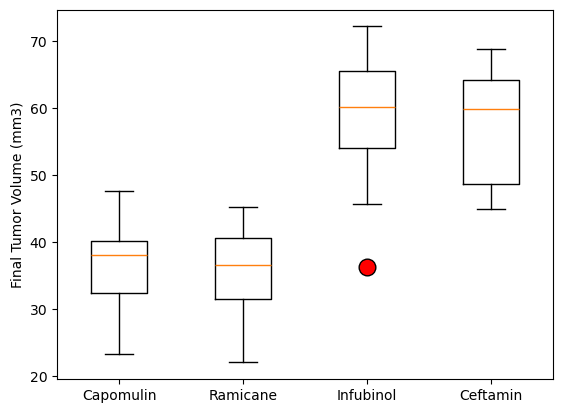

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.


## Line and Scatter Plots

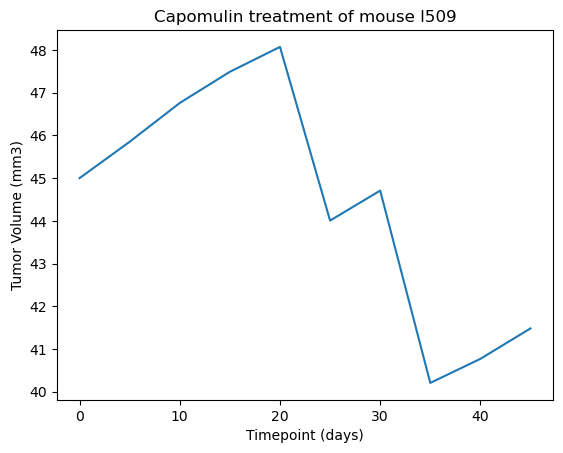

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


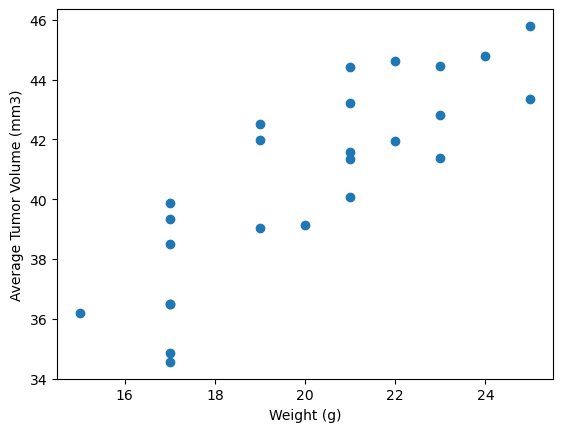

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


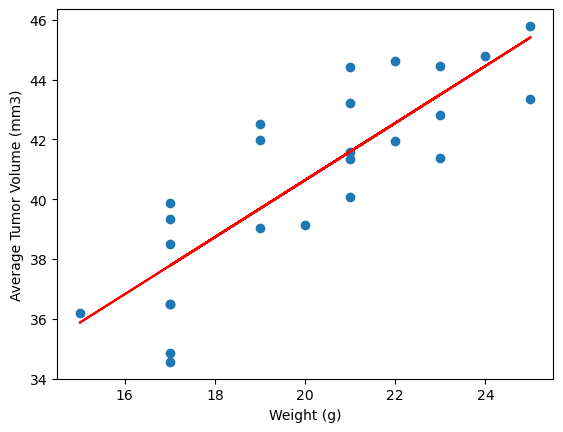

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
